**Handwritten Pressure Analysis**

**Data Loading**

In [1]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory(
    directory="data",
    image_size=(500, 500),
    shuffle=True,
    seed=42
)

Found 389 files belonging to 2 classes.


In [9]:
data.class_names

['high', 'low']

In [10]:
iter = data.as_numpy_iterator()
batch = iter.next()
batch[0].shape

(32, 500, 500, 3)

**Visualization**

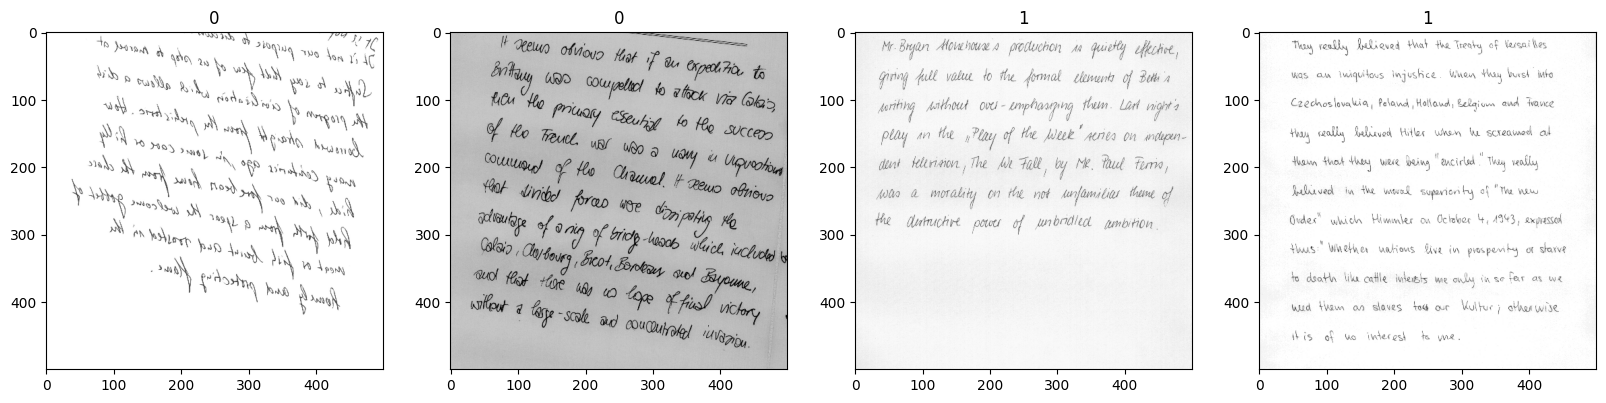

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Preprocessing**

In [11]:
data = data.map(lambda x, y: (x / 255.0, y))

In [12]:
for x,y in data:
    print(y[0])

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [13]:
batch = data.as_numpy_iterator().next()
print(batch[0].min(),batch[0].max())

0.0 1.0


In [2]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.3)

In [3]:
len(data)

13

In [4]:
print(train_size,val_size,test_size)

7 3 3


**Train Test Validation Split**

In [5]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model Architecture

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import DenseNet169

base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 15, 15, 1664)      12642880  
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 256)       3834112   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         295040    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                 

**ResNet Performance**

In [21]:
model.fit(train,validation_data=val,epochs=5)

Epoch 1/5


7/7 [==============================] - 69s 10s/step - loss: 0.5036 - accuracy: 0.7411 - val_loss: 0.4855 - val_accuracy: 0.7188
Epoch 2/5
7/7 [==============================] - 70s 10s/step - loss: 0.4550 - accuracy: 0.7812 - val_loss: 0.4346 - val_accuracy: 0.7812
Epoch 3/5
7/7 [==============================] - 69s 10s/step - loss: 0.4480 - accuracy: 0.7634 - val_loss: 0.4565 - val_accuracy: 0.7396
Epoch 4/5
7/7 [==============================] - 70s 10s/step - loss: 0.4491 - accuracy: 0.7902 - val_loss: 0.4806 - val_accuracy: 0.7604
Epoch 5/5
7/7 [==============================] - 70s 10s/step - loss: 0.4410 - accuracy: 0.7768 - val_loss: 0.4179 - val_accuracy: 0.7812


In [22]:
model.evaluate(test)

3/3 [==============================] - 17s 4s/step - loss: 0.3886 - accuracy: 0.8406


[0.3886319696903229, 0.8405796885490417]

**DenseNet Performance**

**Training**

In [42]:
model.fit(train,validation_data= val , epochs = 6)

Epoch 1/6
7/7 [==============================] - 116s 14s/step - loss: 1.8148 - accuracy: 0.5134 - val_loss: 0.6946 - val_accuracy: 0.5417
Epoch 2/6
7/7 [==============================] - 126s 19s/step - loss: 0.5684 - accuracy: 0.6830 - val_loss: 0.3974 - val_accuracy: 0.8333
Epoch 3/6
7/7 [==============================] - 131s 19s/step - loss: 0.4251 - accuracy: 0.8214 - val_loss: 0.2375 - val_accuracy: 0.9062
Epoch 4/6
7/7 [==============================] - 132s 19s/step - loss: 0.2936 - accuracy: 0.8750 - val_loss: 0.2460 - val_accuracy: 0.8750
Epoch 5/6
7/7 [==============================] - 132s 19s/step - loss: 0.2333 - accuracy: 0.9152 - val_loss: 0.3574 - val_accuracy: 0.7917
Epoch 6/6
7/7 [==============================] - 131s 19s/step - loss: 0.3083 - accuracy: 0.8839 - val_loss: 0.1766 - val_accuracy: 0.9271


In [43]:
model.evaluate(test)

3/3 [==============================] - 18s 4s/step - loss: 0.1482 - accuracy: 0.9565


[0.1481531411409378, 0.95652174949646]

In [64]:
model.save('mod_95.h5')

c:\Users\aswin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Testing**

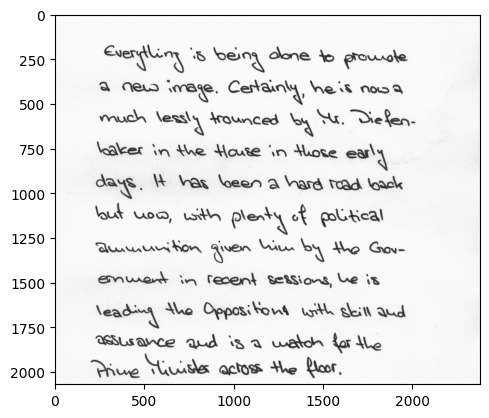

In [1]:
import matplotlib.pyplot as plt
import cv2
test = cv2.imread('high.png')
plt.imshow(test)

In [2]:
from keras.models import load_model
model = load_model('mod_95.h5')

In [7]:
model.layers[-3]

In [3]:
import tensorflow as tf
import numpy as np
import cv2
image = cv2.imread("high.png")
resize = tf.image.resize(image, (500,500))
np.expand_dims(resize, 0).shape
img_arr = np.expand_dims(resize/255 , 0)
value = model.predict(img_arr)
top_class_index = np.argmax(value, axis=1)[0]

1/1 [==============================] - 6s 6s/step


In [4]:
value

array([[0.00050989]], dtype=float32)

In [5]:
if value>0.5:
    print('low pressure')
else:
    print('high pressure')

high pressure


**XAI**

Linear Regression Explainability

In [48]:
import skimage.segmentation
superpixels = skimage.segmentation.quickshift(img_arr[0], kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

141

Segmentation

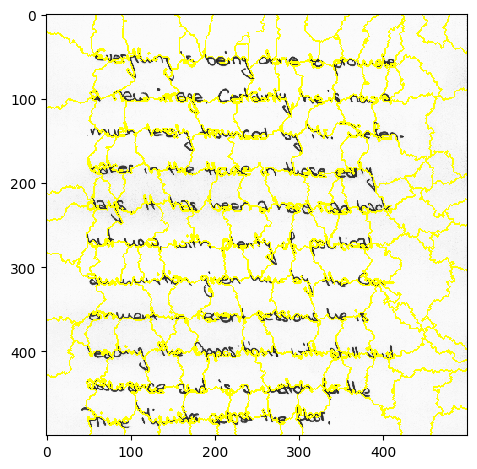

In [49]:
import skimage.io
skimage.io.imshow(skimage.segmentation.mark_boundaries(img_arr[0], superpixels))

In [50]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1])

Creating a mask for the image

In [51]:
import copy
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

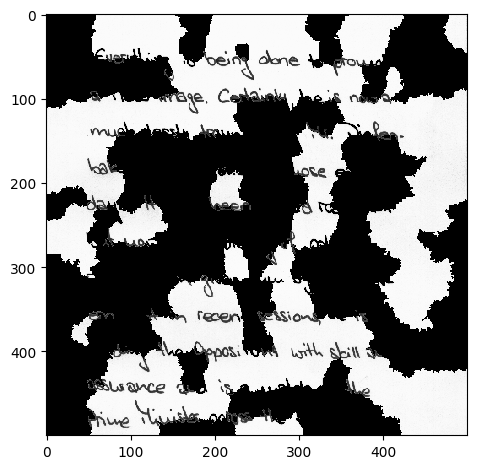

In [52]:
skimage.io.imshow(perturb_image(img_arr[0],perturbations[0],superpixels))

 Gathering Predictions for Perturbed Images

In [53]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(img_arr[0],pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 423ms/step


(150, 1, 1)

Interpreting Model Predictions with Linear Regression

In [54]:
import sklearn
from sklearn.linear_model import LinearRegression
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
class_to_explain = top_class_index
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([-1.89657832e-03, -4.63496330e-04, -8.52053897e-04, -3.55985027e-04,
       -6.09443075e-04, -4.33079040e-04,  7.42476025e-04, -7.00606359e-04,
        1.52306311e-03,  2.25131841e-03,  6.35593948e-04,  1.04454037e-03,
       -3.99453943e-04, -2.75936601e-04, -2.37709961e-04, -7.48540111e-04,
        1.05066953e-04,  4.25531741e-05, -2.44050015e-03,  1.21197647e-03,
       -5.36815822e-04, -6.56783373e-05, -9.12762161e-04, -2.44527930e-04,
       -1.30494832e-03,  9.96043955e-04, -9.80144899e-04, -1.33676905e-03,
        1.63722359e-03, -2.27238594e-03,  5.57102278e-04,  6.63919454e-04,
       -2.64756686e-03, -1.13412098e-03,  1.06826136e-03, -1.31817153e-03,
        1.39545751e-03,  6.58031910e-04,  2.21101858e-03,  7.87834237e-05,
       -2.91614968e-04, -7.94493275e-05,  9.68007380e-05, -7.22594276e-04,
       -1.21341129e-03,  5.35070795e-04,  5.95414858e-04,  5.72090947e-04,
        1.20547541e-03, -6.25265593e-04, -1.65838369e-03, -9.67760642e-04,
        3.20467890e-03,  

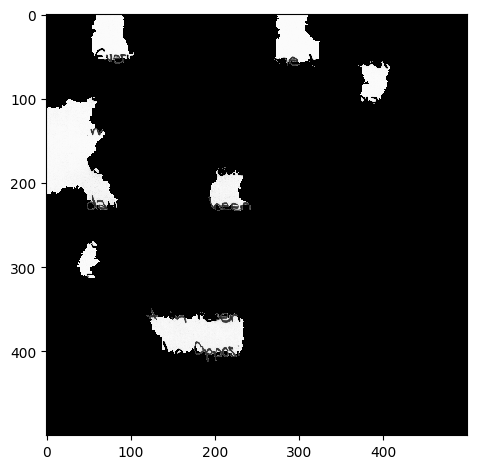

In [55]:
num_top_features = 10
top_features = np.argsort(coeff)[-num_top_features:] 
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(img_arr[0],mask,superpixels) )

**Lime Explainability**

In [62]:
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
explainer = lime_image.LimeImageExplainer()
# Defining the number of segments to create for explanations
num_features = 100

explanation = explainer.explain_instance(img_arr[0], model.predict, top_labels=5, num_features=num_features)

  0%|          | 5/1000 [00:00<00:22, 45.01it/s]

1/1 [==============================] - 2s 2s/step


  2%|▏         | 16/1000 [00:02<02:46,  5.90it/s]

1/1 [==============================] - 2s 2s/step


  3%|▎         | 26/1000 [00:05<03:14,  5.00it/s]

1/1 [==============================] - 2s 2s/step


  4%|▎         | 36/1000 [00:08<03:21,  4.79it/s]

1/1 [==============================] - 2s 2s/step


  5%|▍         | 46/1000 [00:10<03:23,  4.69it/s]

1/1 [==============================] - 2s 2s/step


  6%|▌         | 56/1000 [00:13<03:23,  4.63it/s]

1/1 [==============================] - 2s 2s/step


  7%|▋         | 66/1000 [00:16<03:17,  4.73it/s]

1/1 [==============================] - 2s 2s/step


  8%|▊         | 76/1000 [00:18<03:17,  4.69it/s]

1/1 [==============================] - 2s 2s/step


  9%|▊         | 86/1000 [00:21<03:13,  4.72it/s]

1/1 [==============================] - 2s 2s/step


 10%|▉         | 95/1000 [00:24<03:23,  4.44it/s]

1/1 [==============================] - 2s 2s/step


 11%|█         | 106/1000 [00:26<03:07,  4.77it/s]

1/1 [==============================] - 2s 2s/step


 12%|█▏        | 116/1000 [00:29<03:06,  4.75it/s]

1/1 [==============================] - 3s 3s/step


 13%|█▎        | 126/1000 [00:32<03:11,  4.57it/s]

1/1 [==============================] - 3s 3s/step


 14%|█▍        | 139/1000 [00:35<02:40,  5.35it/s]

1/1 [==============================] - 2s 2s/step


 15%|█▍        | 148/1000 [00:37<03:06,  4.56it/s]

1/1 [==============================] - 2s 2s/step


 16%|█▌        | 158/1000 [00:40<03:03,  4.59it/s]

1/1 [==============================] - 2s 2s/step


 17%|█▋        | 168/1000 [00:43<03:00,  4.61it/s]

1/1 [==============================] - 2s 2s/step


 18%|█▊        | 178/1000 [00:45<02:57,  4.62it/s]

1/1 [==============================] - 2s 2s/step


 19%|█▉        | 188/1000 [00:48<02:54,  4.66it/s]

1/1 [==============================] - 2s 2s/step


 20%|█▉        | 198/1000 [00:51<02:50,  4.70it/s]

1/1 [==============================] - 2s 2s/step


 21%|██        | 208/1000 [00:53<02:49,  4.68it/s]

1/1 [==============================] - 2s 2s/step


 22%|██▏       | 217/1000 [00:56<02:56,  4.42it/s]

1/1 [==============================] - 2s 2s/step


 23%|██▎       | 227/1000 [00:59<02:49,  4.55it/s]

1/1 [==============================] - 2s 2s/step


 24%|██▎       | 236/1000 [01:01<02:57,  4.30it/s]

1/1 [==============================] - 2s 2s/step


 24%|██▍       | 245/1000 [01:04<02:58,  4.23it/s]

1/1 [==============================] - 2s 2s/step


 26%|██▌       | 256/1000 [01:07<02:42,  4.59it/s]

1/1 [==============================] - 2s 2s/step


 26%|██▋       | 265/1000 [01:09<02:47,  4.40it/s]

1/1 [==============================] - 2s 2s/step


 28%|██▊       | 276/1000 [01:12<02:33,  4.73it/s]

1/1 [==============================] - 2s 2s/step


 28%|██▊       | 285/1000 [01:14<02:40,  4.45it/s]

1/1 [==============================] - 2s 2s/step


 30%|██▉       | 297/1000 [01:17<02:20,  5.01it/s]

1/1 [==============================] - 2s 2s/step


 31%|███       | 307/1000 [01:20<02:23,  4.83it/s]

1/1 [==============================] - 2s 2s/step


 32%|███▏      | 317/1000 [01:22<02:24,  4.72it/s]

1/1 [==============================] - 2s 2s/step


 33%|███▎      | 327/1000 [01:25<02:23,  4.70it/s]

1/1 [==============================] - 2s 2s/step


 34%|███▎      | 336/1000 [01:28<02:30,  4.42it/s]

1/1 [==============================] - 3s 3s/step


 35%|███▍      | 346/1000 [01:31<02:26,  4.45it/s]

1/1 [==============================] - 3s 3s/step


 36%|███▌      | 355/1000 [01:33<02:34,  4.17it/s]

1/1 [==============================] - 3s 3s/step


 36%|███▋      | 365/1000 [01:36<02:31,  4.18it/s]

1/1 [==============================] - 3s 3s/step


 38%|███▊      | 376/1000 [01:39<02:20,  4.44it/s]

1/1 [==============================] - 3s 3s/step


 39%|███▊      | 387/1000 [01:42<02:14,  4.55it/s]

1/1 [==============================] - 2s 2s/step


 40%|███▉      | 397/1000 [01:45<02:11,  4.59it/s]

1/1 [==============================] - 2s 2s/step


 41%|████      | 406/1000 [01:47<02:16,  4.37it/s]

1/1 [==============================] - 2s 2s/step


 42%|████▏     | 416/1000 [01:50<02:09,  4.53it/s]

1/1 [==============================] - 2s 2s/step


 43%|████▎     | 426/1000 [01:53<02:05,  4.57it/s]

1/1 [==============================] - 2s 2s/step


 44%|████▎     | 436/1000 [01:55<02:02,  4.60it/s]

1/1 [==============================] - 2s 2s/step


 44%|████▍     | 445/1000 [01:58<02:09,  4.29it/s]

1/1 [==============================] - 2s 2s/step


 46%|████▌     | 455/1000 [02:01<02:04,  4.38it/s]

1/1 [==============================] - 2s 2s/step


 46%|████▋     | 465/1000 [02:03<02:01,  4.39it/s]

1/1 [==============================] - 2s 2s/step


 48%|████▊     | 476/1000 [02:06<01:51,  4.69it/s]

1/1 [==============================] - 2s 2s/step


 48%|████▊     | 485/1000 [02:09<01:56,  4.40it/s]

1/1 [==============================] - 2s 2s/step


 50%|████▉     | 496/1000 [02:11<01:47,  4.67it/s]

1/1 [==============================] - 2s 2s/step


 50%|█████     | 505/1000 [02:14<01:51,  4.43it/s]

1/1 [==============================] - 2s 2s/step


 52%|█████▏    | 516/1000 [02:17<01:42,  4.74it/s]

1/1 [==============================] - 2s 2s/step


 53%|█████▎    | 529/1000 [02:19<01:22,  5.70it/s]

1/1 [==============================] - 2s 2s/step


 54%|█████▍    | 538/1000 [02:22<01:37,  4.74it/s]

1/1 [==============================] - 3s 3s/step


 55%|█████▍    | 547/1000 [02:25<01:46,  4.27it/s]

1/1 [==============================] - 2s 2s/step


 56%|█████▌    | 556/1000 [02:28<01:44,  4.26it/s]

1/1 [==============================] - 3s 3s/step


 57%|█████▋    | 566/1000 [02:31<01:41,  4.27it/s]

1/1 [==============================] - 2s 2s/step


 57%|█████▊    | 575/1000 [02:33<01:42,  4.15it/s]

1/1 [==============================] - 2s 2s/step


 58%|█████▊    | 585/1000 [02:36<01:36,  4.31it/s]

1/1 [==============================] - 2s 2s/step


 60%|█████▉    | 595/1000 [02:39<01:32,  4.39it/s]

1/1 [==============================] - 2s 2s/step


 61%|██████    | 609/1000 [02:41<01:08,  5.74it/s]

1/1 [==============================] - 2s 2s/step


 62%|██████▏   | 618/1000 [02:44<01:19,  4.80it/s]

1/1 [==============================] - 2s 2s/step


 63%|██████▎   | 627/1000 [02:47<01:23,  4.45it/s]

1/1 [==============================] - 2s 2s/step


 64%|██████▎   | 636/1000 [02:49<01:22,  4.41it/s]

1/1 [==============================] - 2s 2s/step


 65%|██████▍   | 646/1000 [02:52<01:18,  4.53it/s]

1/1 [==============================] - 2s 2s/step


 66%|██████▌   | 655/1000 [02:55<01:19,  4.34it/s]

1/1 [==============================] - 2s 2s/step


 67%|██████▋   | 666/1000 [02:57<01:11,  4.68it/s]

1/1 [==============================] - 2s 2s/step


 68%|██████▊   | 675/1000 [03:00<01:14,  4.37it/s]

1/1 [==============================] - 2s 2s/step


 69%|██████▊   | 686/1000 [03:03<01:07,  4.67it/s]

1/1 [==============================] - 2s 2s/step


 70%|██████▉   | 696/1000 [03:05<01:05,  4.62it/s]

1/1 [==============================] - 2s 2s/step


 71%|███████   | 706/1000 [03:08<01:03,  4.64it/s]

1/1 [==============================] - 2s 2s/step


 72%|███████▏  | 716/1000 [03:11<01:01,  4.61it/s]

1/1 [==============================] - 2s 2s/step


 73%|███████▎  | 726/1000 [03:13<00:59,  4.64it/s]

1/1 [==============================] - 2s 2s/step


 74%|███████▎  | 736/1000 [03:16<00:56,  4.64it/s]

1/1 [==============================] - 2s 2s/step


 75%|███████▍  | 746/1000 [03:19<00:55,  4.58it/s]

1/1 [==============================] - 2s 2s/step


 76%|███████▌  | 756/1000 [03:21<00:52,  4.63it/s]

1/1 [==============================] - 2s 2s/step


 76%|███████▋  | 765/1000 [03:24<00:53,  4.38it/s]

1/1 [==============================] - 2s 2s/step


 78%|███████▊  | 775/1000 [03:27<00:50,  4.45it/s]

1/1 [==============================] - 2s 2s/step


 79%|███████▊  | 786/1000 [03:29<00:45,  4.71it/s]

1/1 [==============================] - 2s 2s/step


 80%|███████▉  | 796/1000 [03:32<00:43,  4.73it/s]

1/1 [==============================] - 2s 2s/step


 80%|████████  | 805/1000 [03:35<00:43,  4.47it/s]

1/1 [==============================] - 2s 2s/step


 82%|████████▏ | 815/1000 [03:37<00:41,  4.51it/s]

1/1 [==============================] - 2s 2s/step


 83%|████████▎ | 826/1000 [03:40<00:36,  4.79it/s]

1/1 [==============================] - 2s 2s/step


 84%|████████▎ | 835/1000 [03:42<00:37,  4.44it/s]

1/1 [==============================] - 2s 2s/step


 85%|████████▍ | 846/1000 [03:45<00:33,  4.64it/s]

1/1 [==============================] - 2s 2s/step


 86%|████████▌ | 855/1000 [03:48<00:33,  4.37it/s]

1/1 [==============================] - 2s 2s/step


 87%|████████▋ | 866/1000 [03:51<00:28,  4.72it/s]

1/1 [==============================] - 2s 2s/step


 88%|████████▊ | 875/1000 [03:53<00:28,  4.35it/s]

1/1 [==============================] - 2s 2s/step


 89%|████████▊ | 886/1000 [03:56<00:24,  4.62it/s]

1/1 [==============================] - 2s 2s/step


 90%|████████▉ | 896/1000 [03:59<00:22,  4.63it/s]

1/1 [==============================] - 2s 2s/step


 91%|█████████ | 906/1000 [04:01<00:20,  4.64it/s]

1/1 [==============================] - 2s 2s/step


 92%|█████████▏| 916/1000 [04:04<00:18,  4.61it/s]

1/1 [==============================] - 2s 2s/step


 93%|█████████▎| 926/1000 [04:07<00:16,  4.58it/s]

1/1 [==============================] - 2s 2s/step


 94%|█████████▎| 936/1000 [04:09<00:13,  4.58it/s]

1/1 [==============================] - 2s 2s/step


 94%|█████████▍| 945/1000 [04:12<00:12,  4.33it/s]

1/1 [==============================] - 2s 2s/step


 96%|█████████▌| 956/1000 [04:15<00:09,  4.66it/s]

1/1 [==============================] - 2s 2s/step


 97%|█████████▋| 966/1000 [04:17<00:07,  4.65it/s]

1/1 [==============================] - 2s 2s/step


 98%|█████████▊| 975/1000 [04:20<00:05,  4.40it/s]

1/1 [==============================] - 2s 2s/step


 99%|█████████▊| 986/1000 [04:23<00:02,  4.70it/s]

1/1 [==============================] - 3s 3s/step


100%|█████████▉| 995/1000 [04:26<00:01,  4.16it/s]

1/1 [==============================] - 3s 3s/step


100%|██████████| 1000/1000 [04:28<00:00,  3.72it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


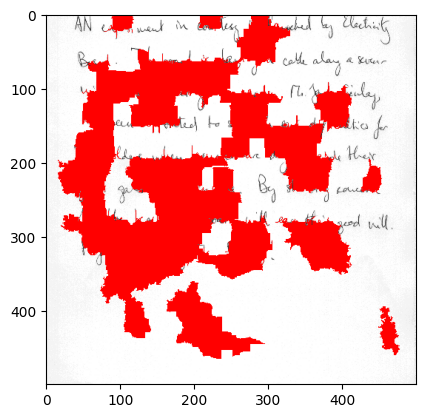

In [63]:
def mark_boundaries(image, mask):
  boundaries = np.where(mask > 0.8 * mask.max())

  highlighted_image = image.copy()
  highlighted_image[boundaries] = (255, 0, 0)

  return highlighted_image

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=num_features, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

**Linear Regression Explainer** :directly perturbs superpixels of the image and builds a simple linear regression model on these perturbations to explain the predictions. (Less Accurate)


**Lime Explainer**  :uses the LIME framework, which generates perturbations around the instance to be explained and fits a trained model to these perturbations, providing local interpretations.


LIME provides a more standardized and widely used framework for model explanation, while Approach 1 is more custom and primitve to the task at hand